In [1]:
from reader_aug import Data
from reader_aug import encode, decode, point_form
from matplotlib import pyplot as plt
import numpy as np
import cv2
%matplotlib inline
from cfgs.config import cfg

In [23]:
train_list = ["voc_2007_train.txt", "voc_2012_train.txt", "voc_2007_val.txt", "voc_2012_val.txt"]
df = Data(train_list, shuffle=False, flip=True, random_crop=True, random_expand=True, random_inter=True, random_distort=True, save_img=False)

In [24]:
df.reset_state()

In [25]:
g = df.get_data()

In [42]:
dp = next(g)

In [43]:
image = dp[0]

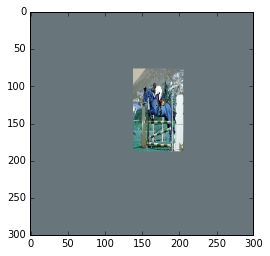

In [44]:
plt.imshow(image)

In [45]:
gt_boxes = dp[1]

In [46]:
image_with_boxes_1 = np.copy(image)
image_with_boxes_2 = np.copy(image)
height, width, _ = image.shape

In [47]:
for gt_box in gt_boxes:
    cv2.rectangle(image_with_boxes_1,
                  (int(width * gt_box[1]), int(height * gt_box[0])),
                  (int(width * gt_box[3]), int(height * gt_box[2])),
                  (255, 0, 0),
                  3)
    if np.sum(gt_box) == 0:
        break

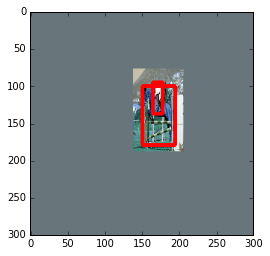

In [48]:
plt.imshow(image_with_boxes_1)

In [49]:
anchor_cls = dp[2]
anchor_neg_mask = dp[3]
anchor_loc = dp[4]

In [50]:
anchor_cls

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
boxes = decode(anchor_loc)

In [52]:
boxes.shape

(11620, 4)

In [53]:
anchor_pos_mask = np.invert(anchor_neg_mask)
selected_anchors = cfg.all_anchors[anchor_pos_mask]
selected_point_form_anchors = point_form(selected_anchors)

In [54]:
decode_boxes = boxes[anchor_pos_mask]

In [55]:
for gt_box in decode_boxes:
    cv2.rectangle(image_with_boxes_2,
                  (int(width * gt_box[0]), int(height * gt_box[1])),
                  (int(width * gt_box[2]), int(height * gt_box[3])),
                  (255, 0, 0),
                  3)
for anchor_box in selected_point_form_anchors:
    cv2.rectangle(image_with_boxes_2,
                  (int(width * anchor_box[0]), int(height * anchor_box[1])),
                  (int(width * anchor_box[2]), int(height * anchor_box[3])),
                  (0, 0, 255),
                  3)

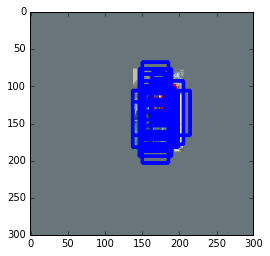

In [56]:
plt.imshow(image_with_boxes_2)